In [2]:
from __future__ import print_function

import sys
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/denoising-autoencoder/")
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/")

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.autograd import Variable
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

import autoencoder
import convnet

%matplotlib inline

## Autoencoder

In [3]:
trX, teX, trY, teY = convnet.load_mnist(onehot=False)
trX = np.array([x.flatten() for x in trX])
teX = np.array([x.flatten() for x in teX])
trX = Variable(torch.FloatTensor(trX))
teX = Variable(torch.FloatTensor(teX))

N = 60000
d_in = 784
d_out = 500
dtype = torch.FloatTensor
batch_size = 64
corruption = 0.2

ae = autoencoder.Autoencoder(n_visible=d_in, 
                             n_hidden=d_out,
                             batch_size=batch_size,
                             corruption=corruption)

optimizer = torch.optim.SGD(ae.parameters(), lr=0.01)
epochs = 30

In [4]:
ae.train_ae(trX, optimizer, epochs)

Epoch: 0 cost: 109.435935974
Epoch: 1 cost: 86.253616333
Epoch: 2 cost: 80.7309494019
Epoch: 3 cost: 77.7161560059
Epoch: 4 cost: 75.7334060669
Epoch: 5 cost: 74.2789230347
Epoch: 6 cost: 73.1950683594
Epoch: 7 cost: 72.3766326904
Epoch: 8 cost: 71.6590652466
Epoch: 9 cost: 71.1321868896
Epoch: 10 cost: 70.6512527466
Epoch: 11 cost: 70.2401504517
Epoch: 12 cost: 69.8976745605
Epoch: 13 cost: 69.5770187378
Epoch: 14 cost: 69.3185882568
Epoch: 15 cost: 69.06275177
Epoch: 16 cost: 68.8840332031
Epoch: 17 cost: 68.6423339844
Epoch: 18 cost: 68.4564285278
Epoch: 19 cost: 68.2990188599
Epoch: 20 cost: 68.1493606567
Epoch: 21 cost: 68.049407959
Epoch: 22 cost: 67.8581924438
Epoch: 23 cost: 67.7349472046
Epoch: 24 cost: 67.6237640381
Epoch: 25 cost: 67.5334625244
Epoch: 26 cost: 67.409828186
Epoch: 27 cost: 67.3313980103
Epoch: 28 cost: 67.2113037109
Epoch: 29 cost: 67.0972290039


## Visualizing Reconstructed Input

In [6]:
bX = teX[:64]
t = ae.encode(bX)
t2 = ae.decode(t)
ind = 25
temp = bX[ind].data.clone()
temp2 = ae.corrupt(Variable(temp))

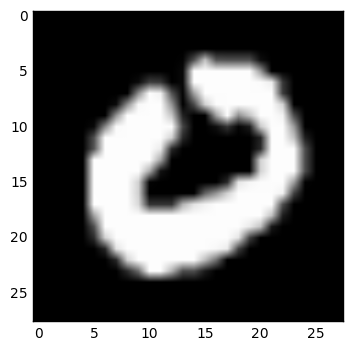

In [7]:
plt.imshow(temp.numpy().reshape(28, 28), cmap='gray')

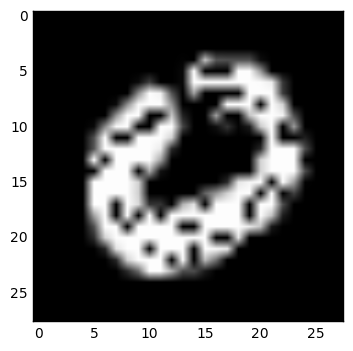

In [8]:
plt.imshow(temp2.data.numpy().reshape(28, 28), cmap='gray')

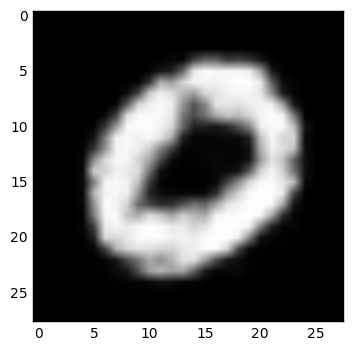

In [9]:
plt.imshow(t2[ind].data.numpy().reshape(28, 28), cmap='gray')